In [193]:
library(tidyverse)
# you can also just download ggplot
library(dplyr)
# install.packages("corrplot")
library(corrplot)

In [142]:
# convert to dataframe
mpg <- as.data.frame(mpg)

# factorize the categorical variables
mpg$manufacturer <- factor(mpg$manufacturer)
mpg$model <- factor(mpg$model)
mpg$trans <- factor(mpg$trans)
mpg$drv <- factor(mpg$drv)
mpg$cty <- factor(mpg$cty)
mpg$fl <- factor(mpg$fl)
mpg$class <- factor(mpg$class)

head(mpg, 10)

manufacturer model      displ year cyl trans      drv cty hwy fl class  
1  audi         a4         1.8   1999 4   auto(l5)   f   18  29  p  compact
2  audi         a4         1.8   1999 4   manual(m5) f   21  29  p  compact
3  audi         a4         2.0   2008 4   manual(m6) f   20  31  p  compact
4  audi         a4         2.0   2008 4   auto(av)   f   21  30  p  compact
5  audi         a4         2.8   1999 6   auto(l5)   f   16  26  p  compact
6  audi         a4         2.8   1999 6   manual(m5) f   18  26  p  compact
7  audi         a4         3.1   2008 6   auto(av)   f   18  27  p  compact
8  audi         a4 quattro 1.8   1999 4   manual(m5) 4   18  26  p  compact
9  audi         a4 quattro 1.8   1999 4   auto(l5)   4   16  25  p  compact
10 audi         a4 quattro 2.0   2008 4   manual(m6) 4   20  28  p  compact

# EDA

### Histograms

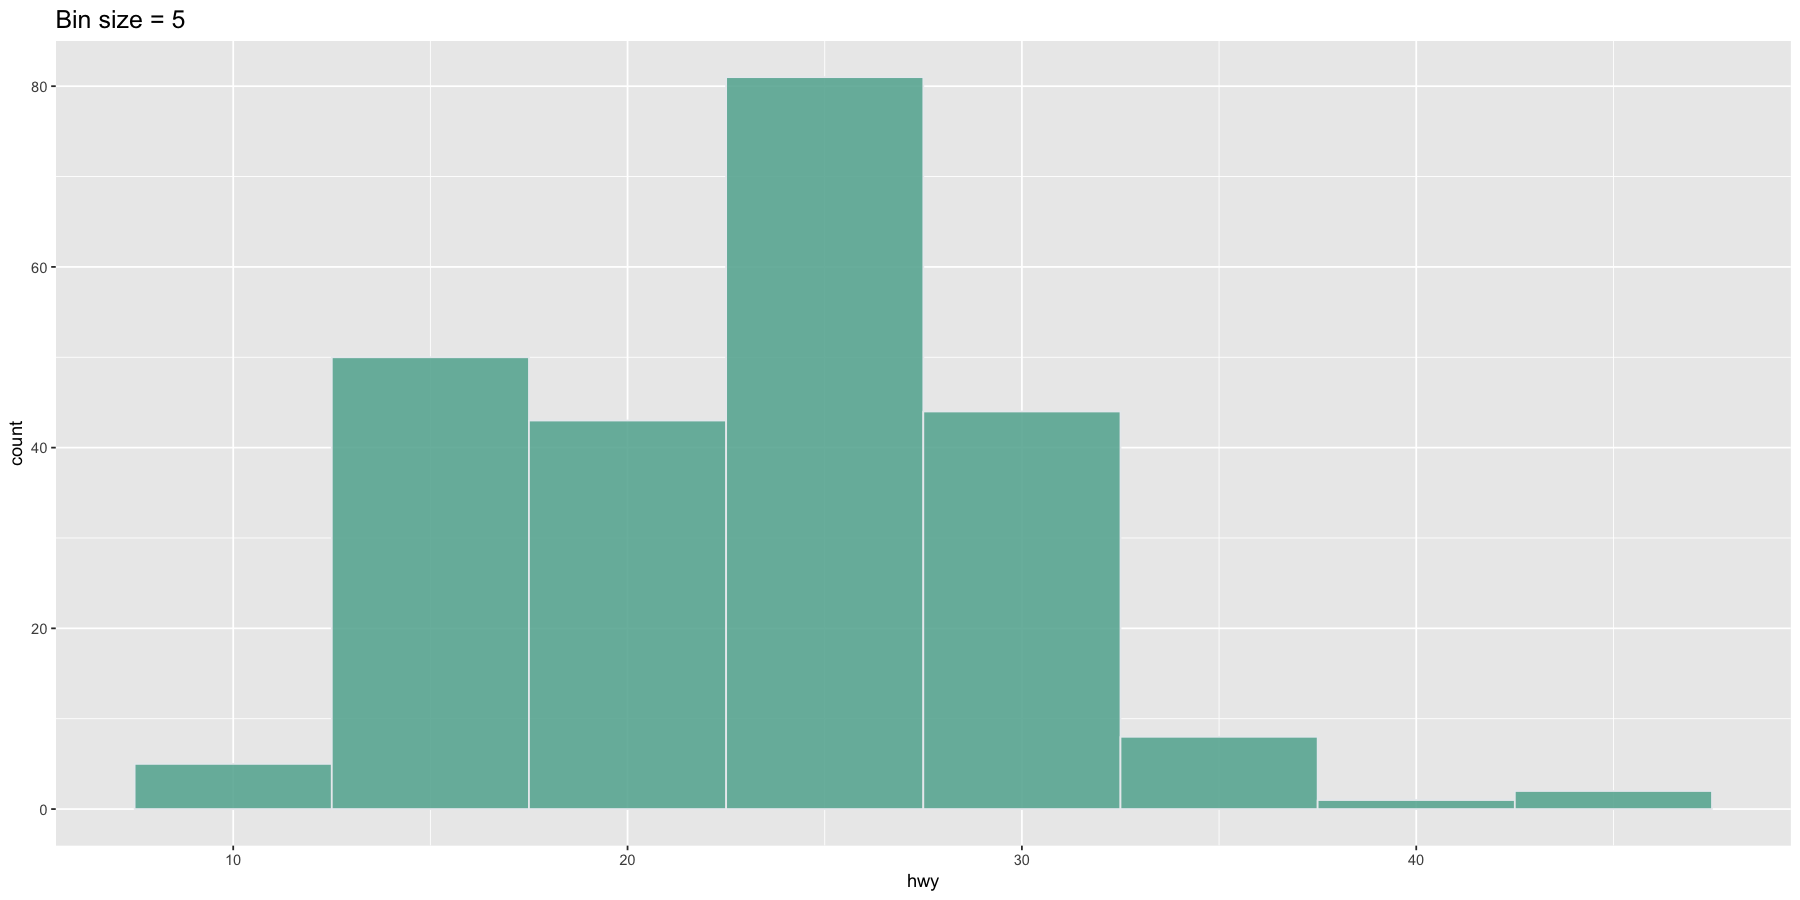

In [221]:
# Simple histogram

p <- mpg %>% 
    ggplot(aes(x=hwy)) + 
    geom_histogram(binwidth=5, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Bin size = 5") +
    theme(plot.title = element_text(size=15))

p

### Bar Charts

In [143]:
# How many models of cars do we have?

# Need to manipulate the data first - feel free to use another way
models <- mpg %>%
            count(model) 

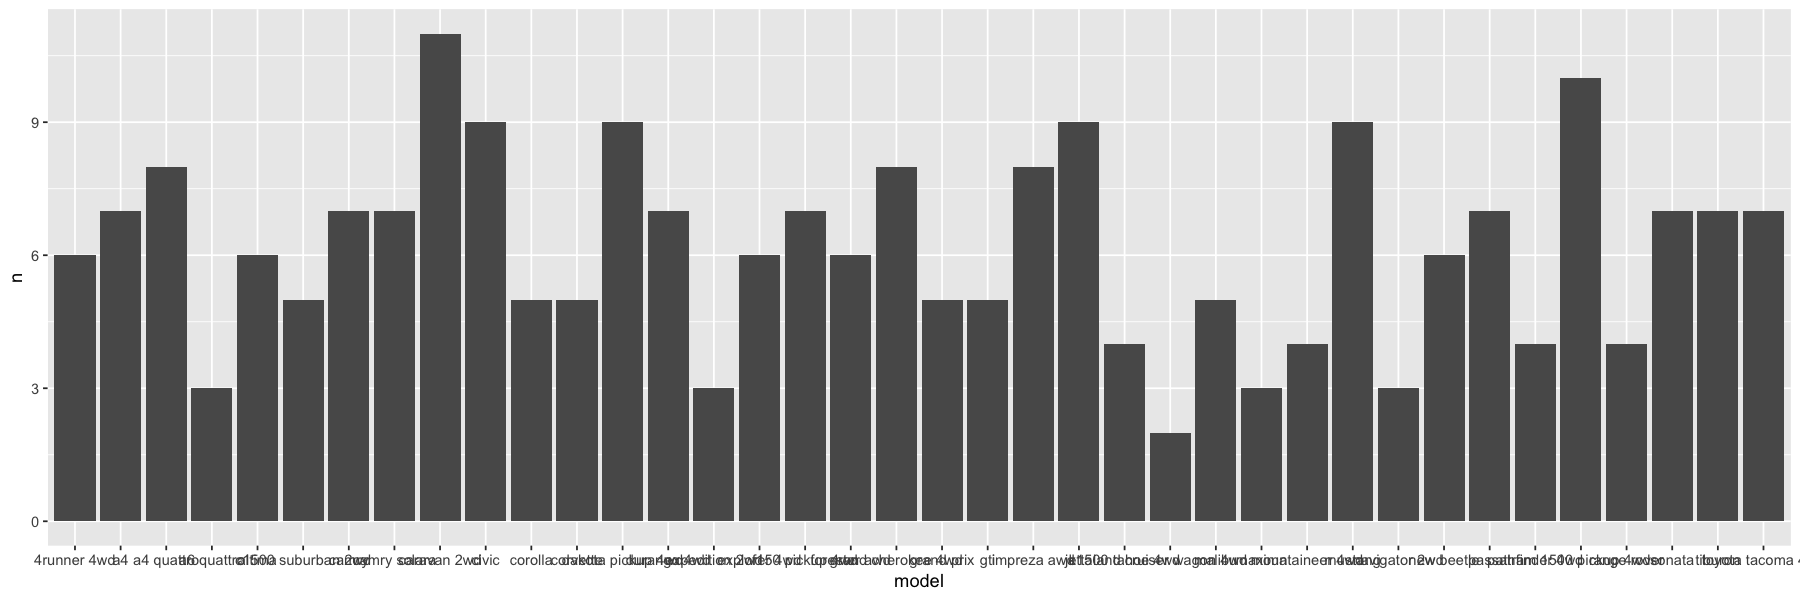

In [144]:
g <- models %>%
         ggplot(aes(x=model, y=n)) +
            geom_bar(stat ="identity")

g

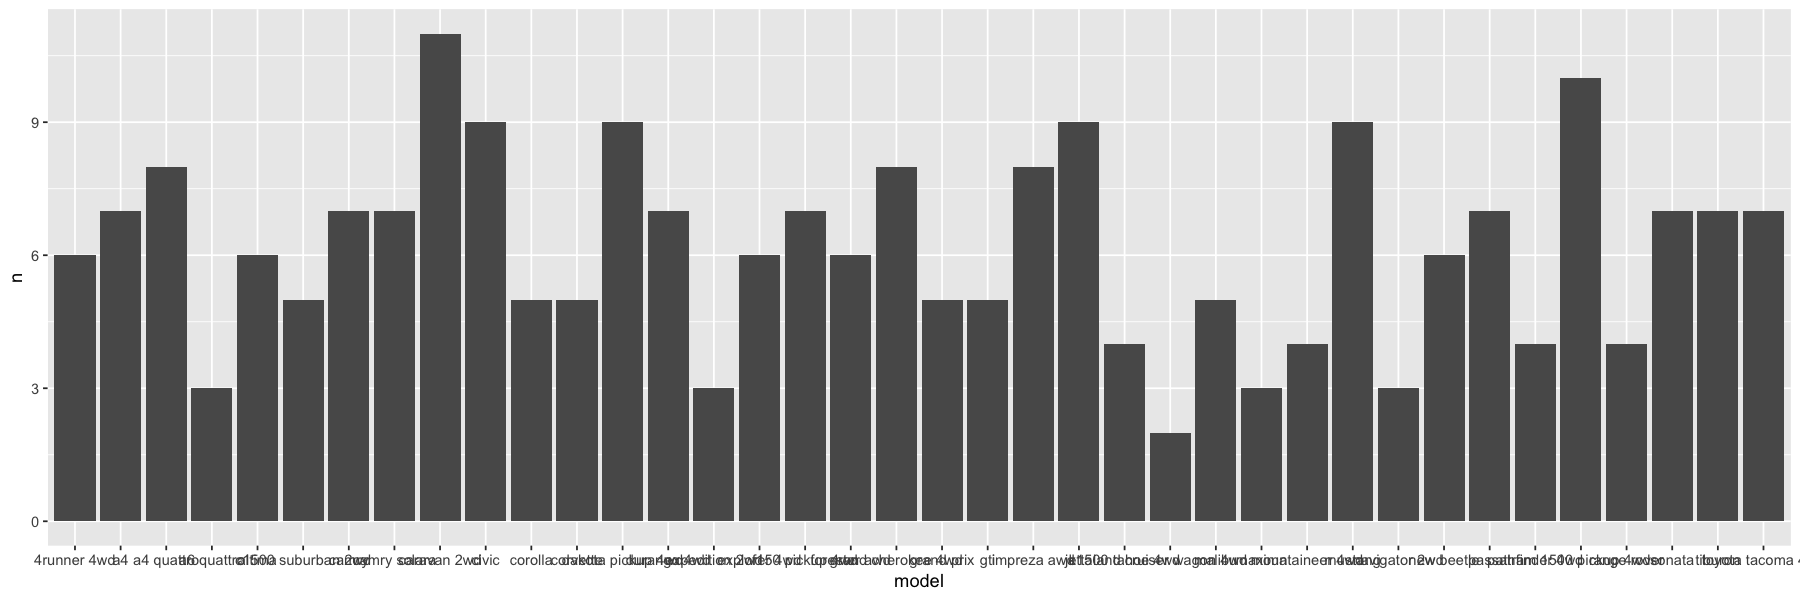

In [145]:
# that's a mesy plot - can we resize it?

library(repr)
# this beautiful package can help with that

options(repr.plot.width=15, repr.plot.height=5)
# Change plot size to 4 x 3

g

In [146]:
# Still not able to read the x-axis ticks. Are we able to change the of the x-axis texts?

g <- g + theme(axis.text.x = element_text(angle=90, hjust=1, size=12))


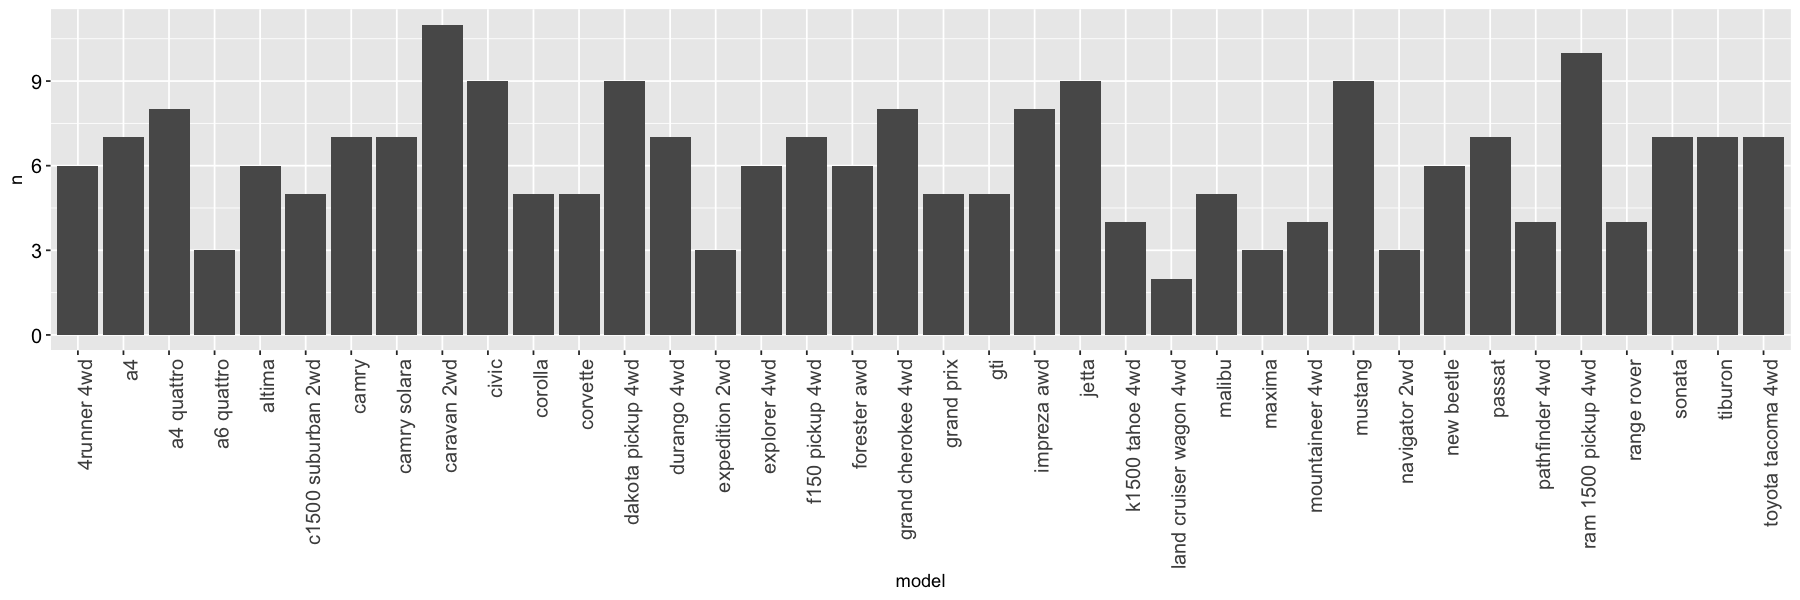

In [147]:
# Change y-axis text

g <- g + theme(axis.text.y = element_text(size=12, color='black'))

g

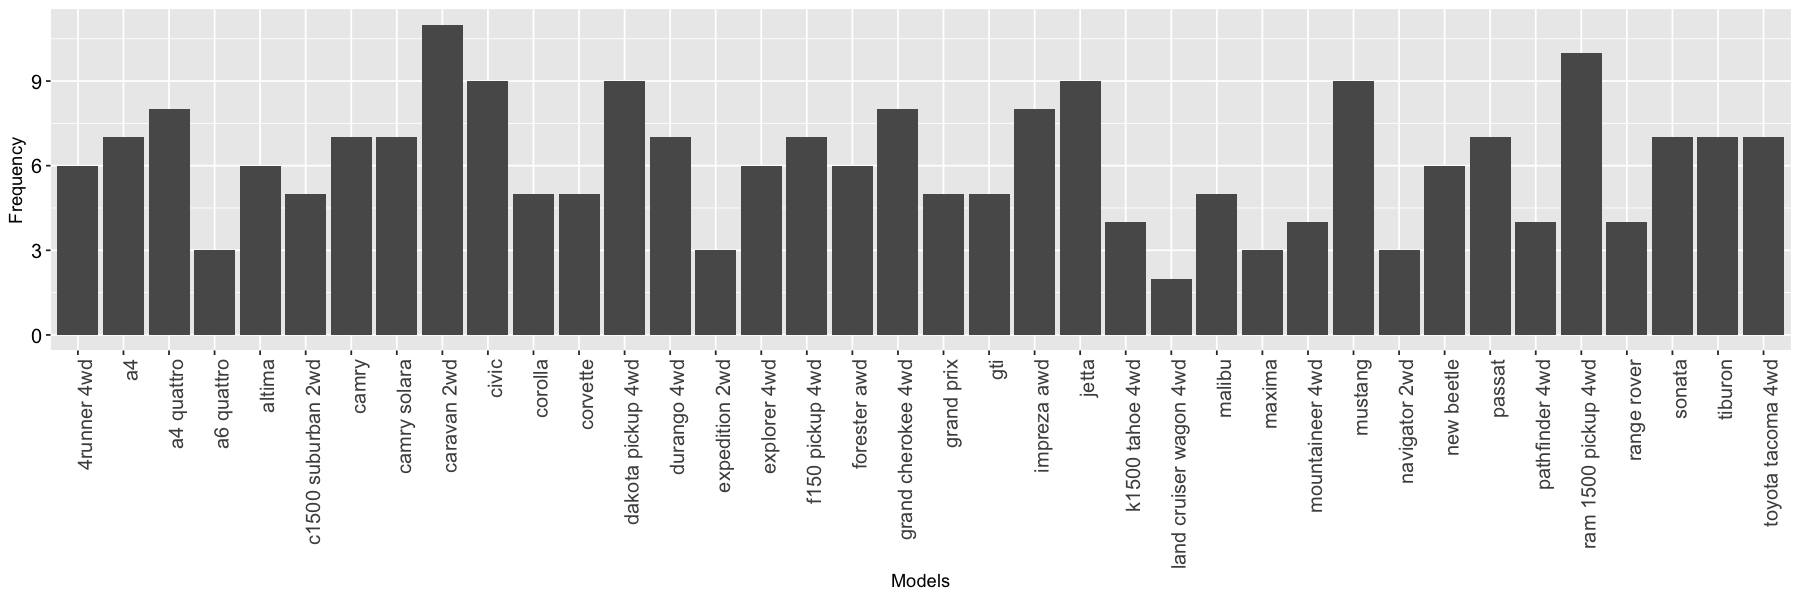

In [148]:
# Can we change the labels? Make them more meaningful?

g <- g + xlab('Models') 
g <- g + ylab('Frequency') 

g

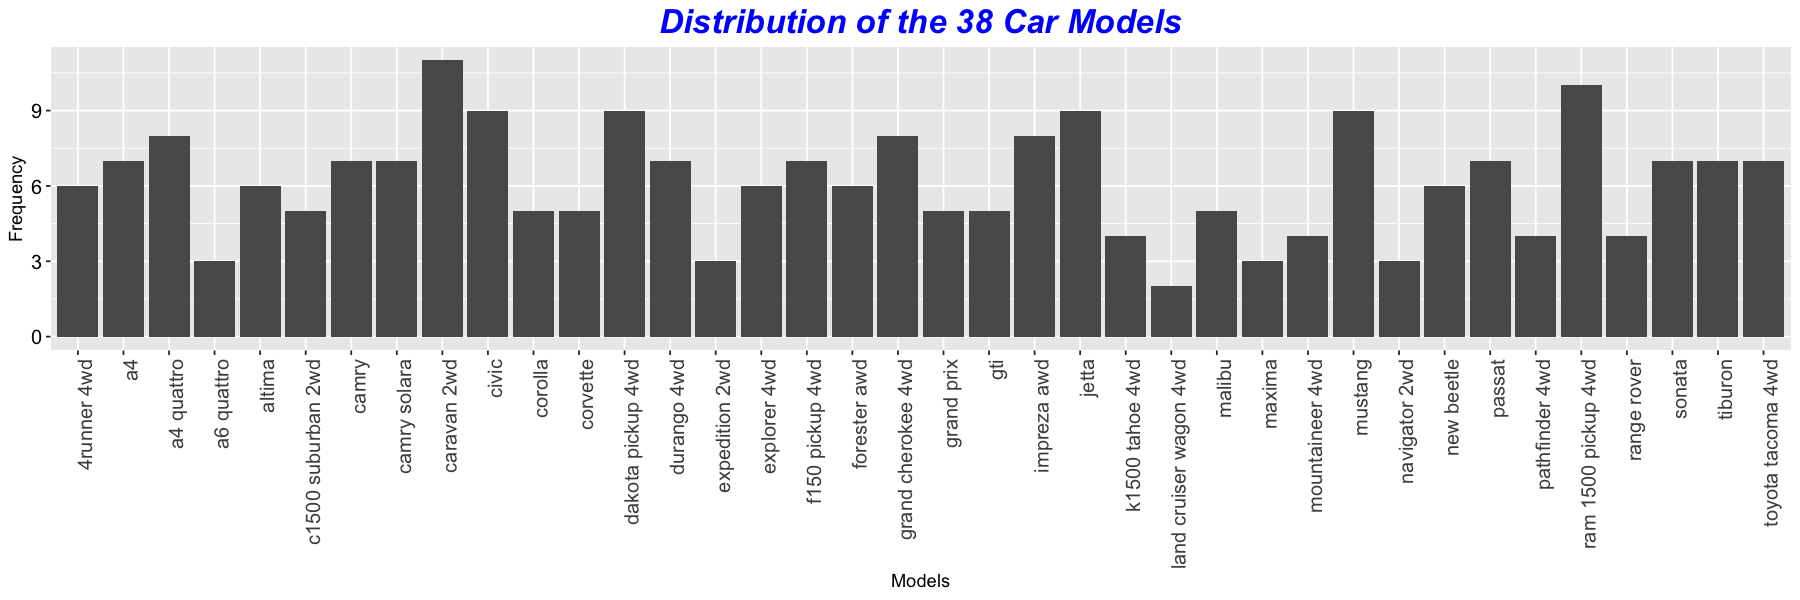

In [149]:
# Add Title
g <- g + ggtitle("Distribution of the 38 Car Models")
g <- g + theme(plot.title = element_text(color="blue", size=20, face="bold.italic", hjust = 0.5))

g

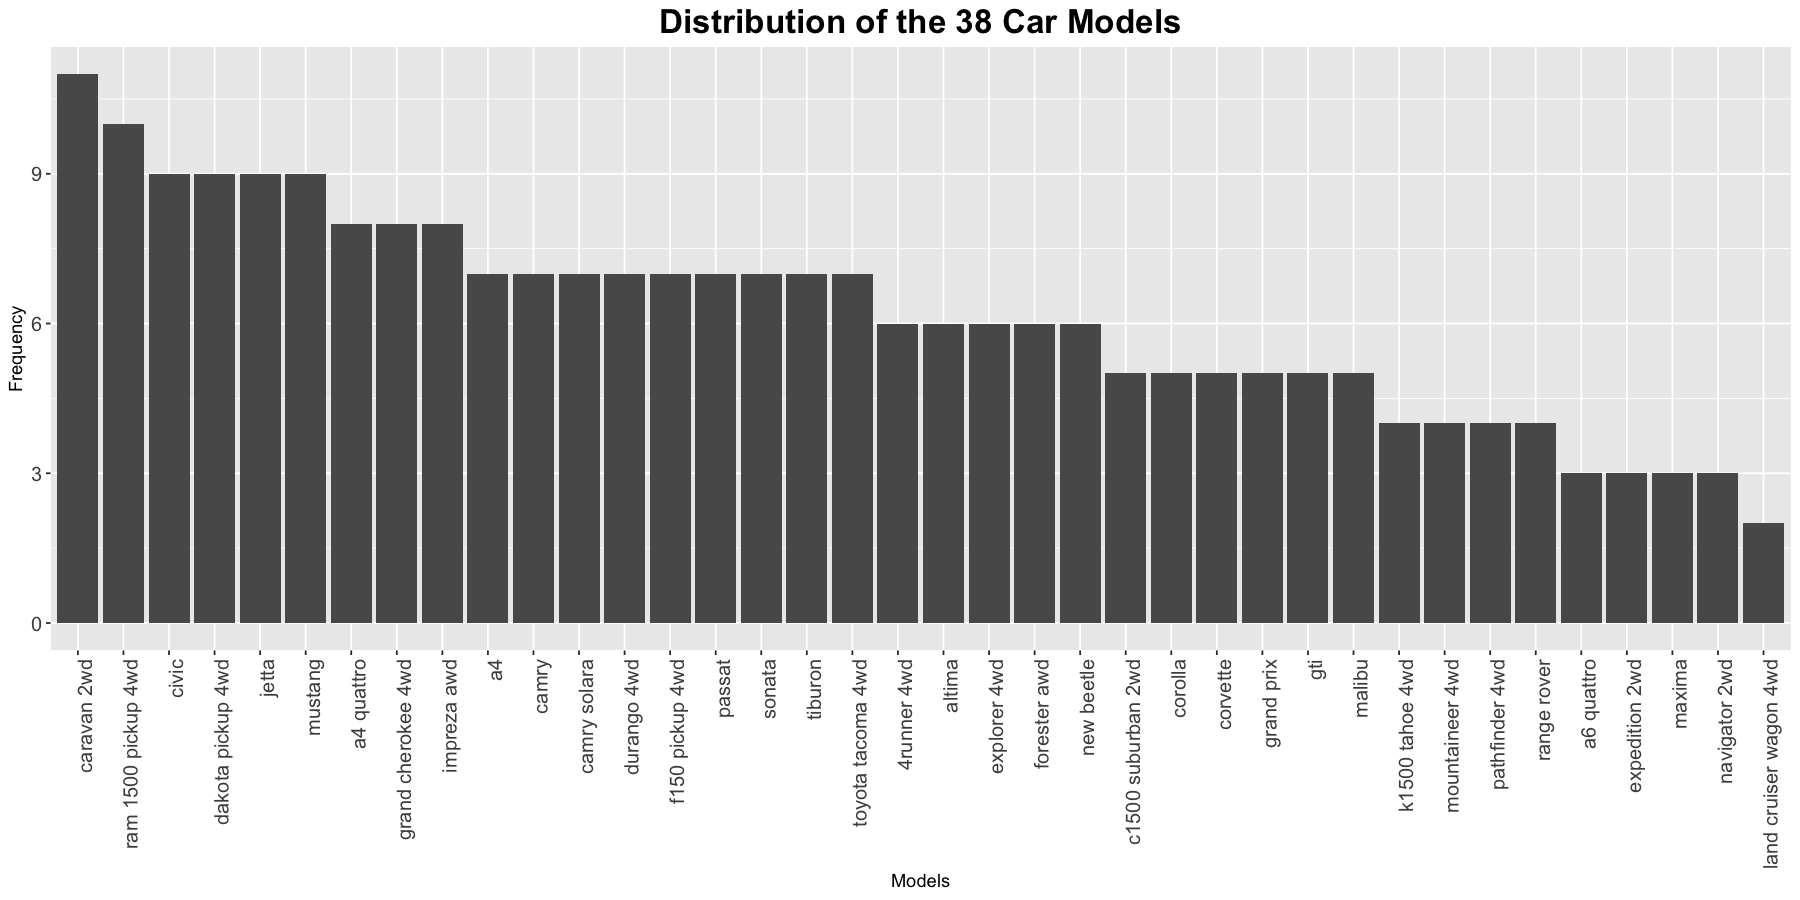

In [150]:
# Can we order the plot?

# order by frequency
options(repr.plot.width=15, repr.plot.height=7.5)

models %>%
        ggplot(aes(x= reorder(model,-n),n)) + 
            geom_bar(stat ="identity") + 
            theme(axis.text.x = element_text(angle=90, hjust=1, size=12),
                  axis.text.y = element_text(size=12),
                  plot.title = element_text(color="black", size=20, face="bold", hjust = 0.5)
                 ) +
            xlab('Models') +
            ylab('Frequency') +
            ggtitle("Distribution of the 38 Car Models")

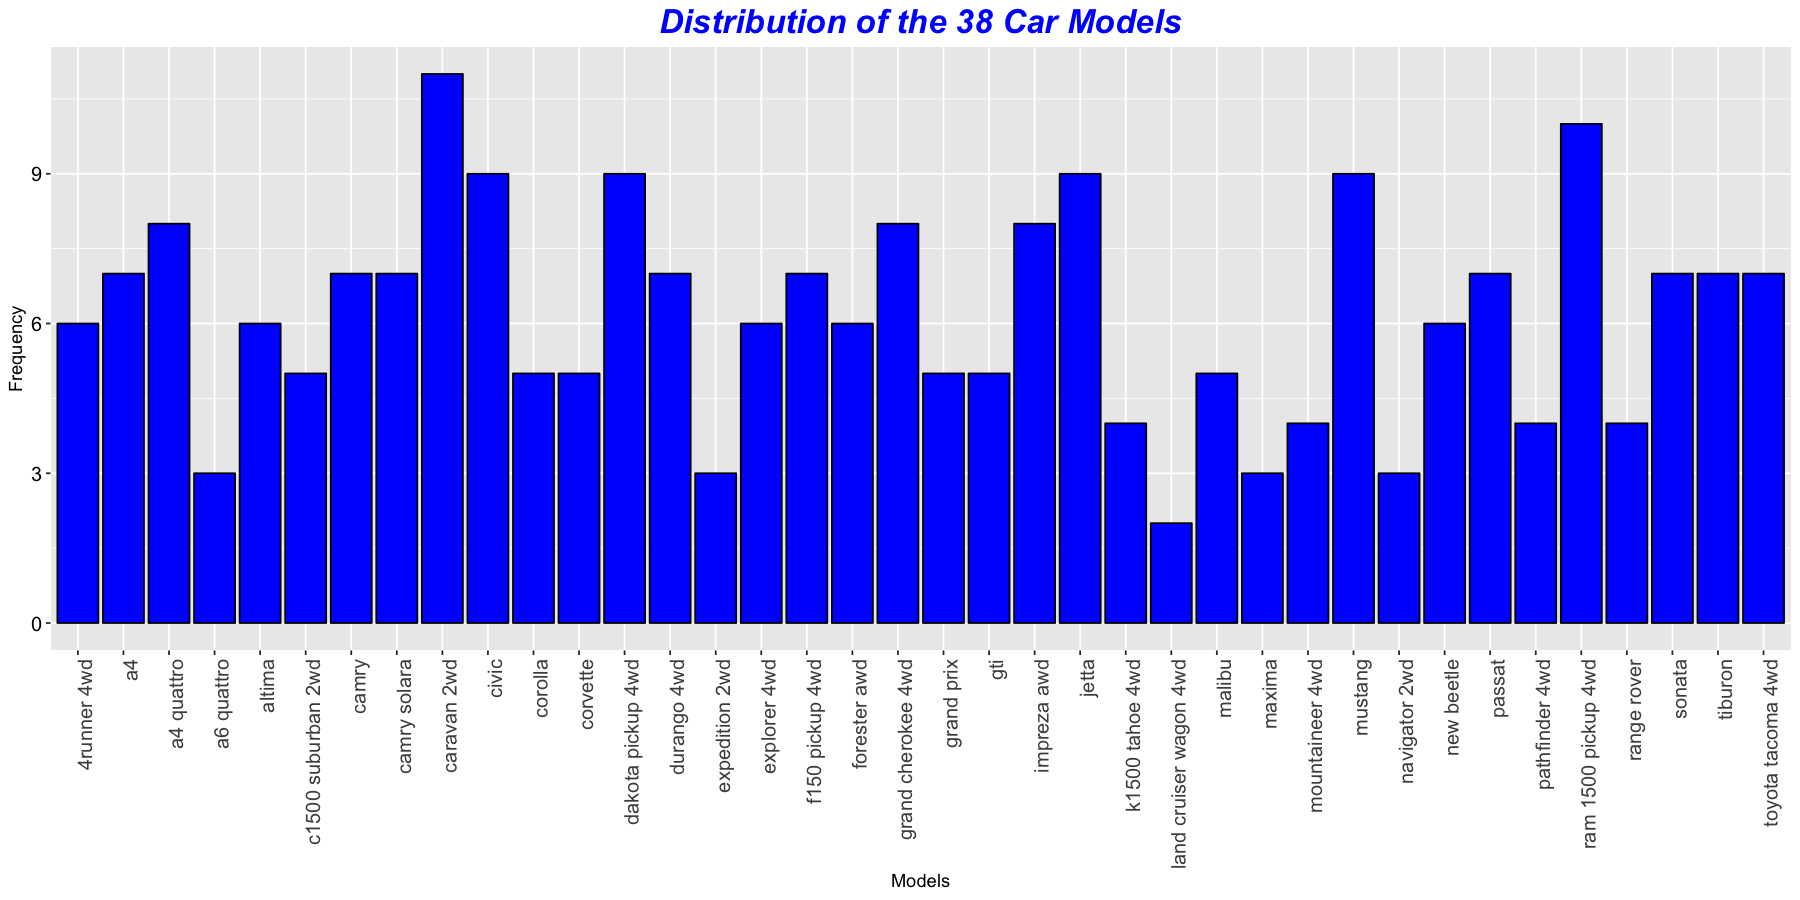

In [176]:
# Aesthetics -- the colour and/or layout of the graph

g + 
 geom_bar(stat="identity", color="black", fill="blue") 

#  theme_minimal() +
#  geom_text(aes(label=n), vjust=-0.3, size=5) # add labels
#  theme(axis.text.x = element_text(angle=90, hjust=1, size=12),
#                   axis.text.y = element_text(size=12),
#                   plot.title = element_text(color="black", size=20, face="bold", hjust = 0.5)
#                  )


In [109]:
# NEED TTO DO


# Suggested Exercise to do as a group:

# 1. Draw a horizontal graph for class
# Hint: Use coord_flip()
# 2. Order by the name
# Hint: XXXX


### Correlation

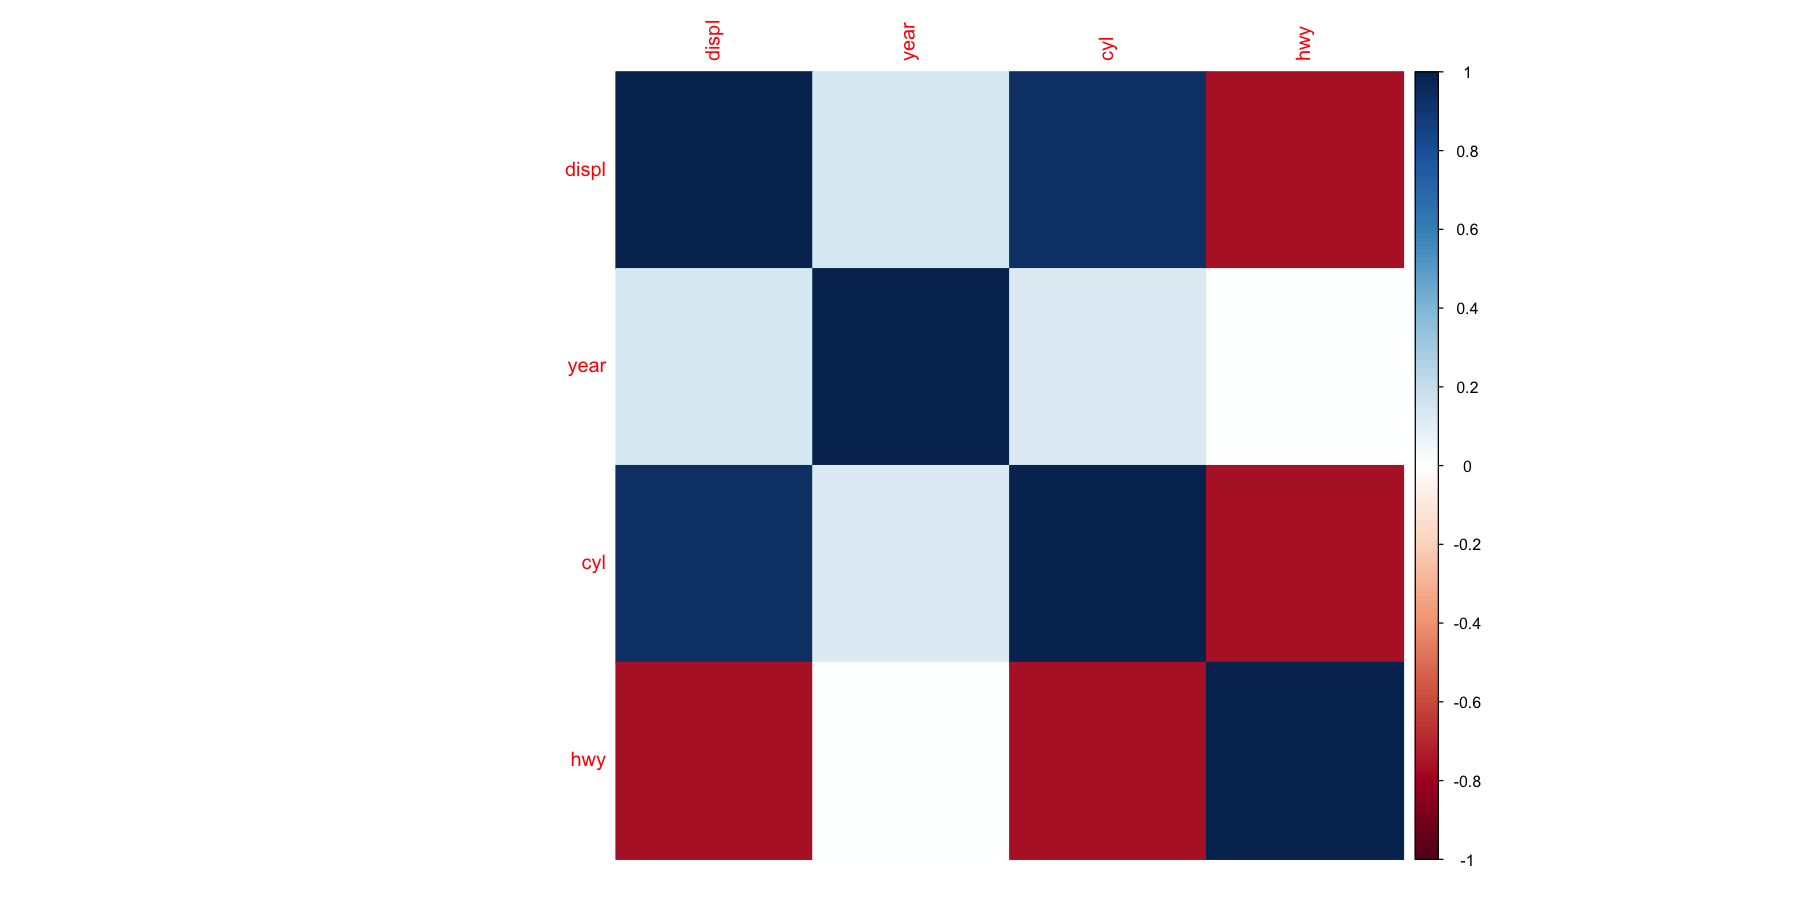

In [199]:
numeric_data <- mpg[, sapply(mpg, is.numeric)]
M <- cor(numeric_data)

corrplot(M, method="color")

Resources: https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html

### Boxplots

### Facet Charts